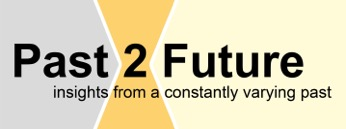

# Variability Figures

## 0. Introduction

This is a notebook that contains/makes some figures for a paper that is being written by Rehfeld et al. Please see the past2future.ipynb for some instructions about notebooks - as this one just gets straight down to business.

### Importing functions
Running the following cell, you are importing python required functions stored in the functions.py file in PMIP4_scripts. 

In [2]:
# press Enter + Shift to run coding cells
from scripts.functions import *
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import iris
from iris import load, Constraint
import iris.quickplot as qplt
import xesmf as xe
%matplotlib inline
import cartopy.crs as ccrs



functions successfully imported


/home/ucfaccb/.conda/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Ensemble averaging

This bit of code shold work out what files contain the required variable, so that they can be loaded in for ensemble averaging

In [56]:
def identify_ensemble_members(variable_name,experiment_name):
    datadir="/data/p2f/cvdp_data"
    ensemble_members=!scripts/find_experiment_ensemble_members.bash {experiment_name} {variable_name} {datadir}
    return ensemble_members

def extract_model_name(filename):
    file_no_path=filename.rpartition("/")
    file_strings=file_no_path[2].partition("_")
    model_name=file_strings[0]
    return model_name

def ensemble_members_dict(variable_name,experiment_name):
    ens_mems=identify_ensemble_members(variable_name,experiment_name)
    ens_mems_dict={extract_model_name(ens_mems[0]):ens_mems[0]}
    for mem in ens_mems[1:]:
        ens_mems_dict[extract_model_name(mem)]=mem
    return ens_mems_dict

def load_ensemble_mean_diffence_map(variable_name,experiment_A,experiment_B):
    n=0; average=0
    A_dict=ensemble_members_dict(variable_name,experiment_A)
    B_dict=ensemble_members_dict(variable_name,experiment_B)
    grid_1x1= xr.Dataset({'lat': (['lat'], np.arange(-90., 90., 1.0)),
                         'lon': (['lon'], np.arange(-179.5, 179.5, 1.0))})
    for gcm in A_dict:
        if gcm in B_dict:
            expt_a_file=xr.open_dataset(A_dict.get(gcm),decode_times=False)
            expt_a=expt_a_file[variable_name]
            expt_b_file=xr.open_dataset(B_dict.get(gcm),decode_times=False)
            expt_b=expt_b_file[variable_name]
            diff=expt_a-expt_b
            this_regridder=xe.Regridder(expt_a_file,grid_1x1,'bilinear', reuse_weights=True) 
            diff_1x1=this_regridder(diff)
            average=(n*average+diff_1x1)/(n+1)
            n=n+1
    return average

def load_ensemble_mean_map(variable_name,experiment_name):
    n=0; average=0
    gcm_dict=ensemble_members_dict(variable_name,experiment_name)
    grid_1x1= xr.Dataset({'lat': (['lat'], np.arange(-90., 90., 1.0)),
                         'lon': (['lon'], np.arange(-179.5, 179.5, 1.0))})
    for gcm in gcm_dict:
        this_file=xr.open_dataset(gcm_dict.get(gcm),decode_times=False)
        this_var=this_file[variable_name]
        this_regridder=xe.Regridder(this_file,grid_1x1,'bilinear', reuse_weights=True) 
        var_1x1=this_regridder(this_var)
        average=(n*average+var_1x1)/(n+1)
        n=n+1
    return average

In [57]:
files_A=identify_ensemble_members("nino34","midHolocene")
print(files_A)
model=extract_model_name(files_A[2])
print(model)

['/data/p2f/cvdp_data/AWI-ESM_midHolocene.cvdp_data.2801-2900.nc', '/data/p2f/cvdp_data/CCSM4_midHolocene.cvdp_data.1000-1300.nc', '/data/p2f/cvdp_data/CNRM-CM5_midHolocene.cvdp_data.1950-2149.nc', '/data/p2f/cvdp_data/FGOALS-g2_midHolocene.cvdp_data.340-1019.nc', '/data/p2f/cvdp_data/GISS-E2-R_midHolocene.cvdp_data.2500-2599.nc', '/data/p2f/cvdp_data/HadGEM2-CC_midHolocene.cvdp_data.1942-1976.nc', '/data/p2f/cvdp_data/HadGEM2-ES_midHolocene.cvdp_data.2061-2161.nc', '/data/p2f/cvdp_data/HadGEM3-GC31_midHolocene.cvdp_data.2250-2349.nc', '/data/p2f/cvdp_data/IPSL-CM5A-LR_midHolocene.cvdp_data.2301-2800.nc', '/data/p2f/cvdp_data/IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc', '/data/p2f/cvdp_data/KCM1-2-2_midHolocene.cvdp_data.1400-1499.nc', '/data/p2f/cvdp_data/MIROC-ESM_midHolocene.cvdp_data.2330-2429.nc', '/data/p2f/cvdp_data/MPI-ESM-P_midHolocene.cvdp_data.1850-1949.nc', '/data/p2f/cvdp_data/MRI-CGCM3_midHolocene.cvdp_data.1951-2050.nc']
CNRM-CM5


Reuse existing file: bilinear_96x192_180x359.nc
Reuse existing file: bilinear_192x288_180x359.nc
Reuse existing file: bilinear_128x256_180x359.nc
Reuse existing file: bilinear_160x320_180x359.nc
Reuse existing file: bilinear_60x128_180x359.nc
Reuse existing file: bilinear_90x144_180x359.nc
Reuse existing file: bilinear_145x192_180x359.nc
Reuse existing file: bilinear_145x192_180x359.nc
Reuse existing file: bilinear_144x192_180x359.nc
Reuse existing file: bilinear_96x96_180x359.nc
Reuse existing file: bilinear_143x144_180x359.nc
Reuse existing file: bilinear_64x128_180x359.nc
Reuse existing file: bilinear_96x192_180x359.nc
Reuse existing file: bilinear_160x320_180x359.nc
<xarray.DataArray 'tas_spatialmean_ann' (lat: 180, lon: 359)>
array([[-20.133079, -20.133202, -20.130555, ..., -20.137207, -20.133973,
        -20.133987],
       [-33.446051, -33.414569, -33.377238, ..., -33.525916, -33.499332,
        -33.487903],
       [-41.668513, -41.577346, -41.488759, ..., -41.827711, -41.784887

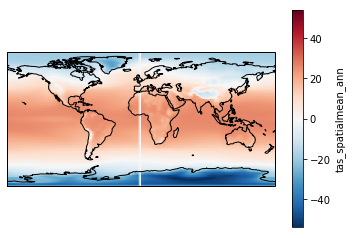

In [59]:
mh_tas=load_ensemble_mean_map("tas_spatialmean_ann","midHolocene")
print(mh_tas)
ax = plt.axes(projection=ccrs.PlateCarree())
mh_tas.plot.pcolormesh(ax=ax);
ax.coastlines();

Reuse existing file: bilinear_96x192_180x359.nc
Reuse existing file: bilinear_192x288_180x359.nc
Reuse existing file: bilinear_128x256_180x359.nc
Reuse existing file: bilinear_160x320_180x359.nc
Reuse existing file: bilinear_90x144_180x359.nc
Reuse existing file: bilinear_145x192_180x359.nc
Reuse existing file: bilinear_144x192_180x359.nc
Reuse existing file: bilinear_96x96_180x359.nc
Reuse existing file: bilinear_143x144_180x359.nc
Reuse existing file: bilinear_64x128_180x359.nc
Reuse existing file: bilinear_96x192_180x359.nc
Reuse existing file: bilinear_160x320_180x359.nc
<xarray.DataArray 'tas_spatialmean_ann' (lat: 180, lon: 359)>
array([[0.034431, 0.033988, 0.037996, ..., 0.026869, 0.029792, 0.031465],
       [0.187489, 0.185962, 0.191142, ..., 0.188445, 0.188715, 0.182206],
       [0.13893 , 0.138185, 0.137537, ..., 0.14185 , 0.140393, 0.139356],
       ...,
       [0.783712, 0.782678, 0.781624, ..., 0.787652, 0.786629, 0.785682],
       [0.806844, 0.806154, 0.805493, ..., 0.808

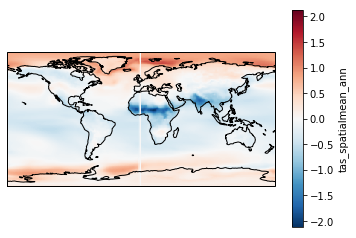

In [60]:
average=load_ensemble_mean_diffence_map("tas_spatialmean_ann","midHolocene","piControl")
print(average)
ax = plt.axes(projection=ccrs.PlateCarree())
average.plot.pcolormesh(ax=ax);
ax.coastlines();

tas_spatialmean_ann / (unknown)     (lat: 180; lon: 359)
     Dimension coordinates:
          lat                           x         -
          lon                           -         x


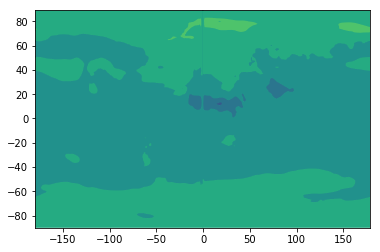

In [50]:
#Can convert this xarray object to an iris cube (but the plot still looks pretty poor)
average_iris=xr.DataArray.to_iris(average)
print(average_iris)
iris.plot.contourf(average_iris,levels=np.arange(-5,5,1),extend='both')

[[-50.347637 -50.34976  -50.35081  ... -50.317616 -50.332375 -50.34215 ]
 [-49.04081  -49.118965 -49.187237 ... -48.665073 -48.814613 -48.93069 ]
 [-48.25056  -48.348587 -48.408638 ... -47.681484 -47.908714 -48.099003]
 ...
 [-17.337662 -17.215439 -17.102314 ... -17.737291 -17.601421 -17.462711]
 [-17.76464  -17.725807 -17.685852 ... -17.896383 -17.849916 -17.806637]
 [-18.100046 -18.095299 -18.090702 ... -18.108234 -18.104961 -18.102001]]
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


ValueError: 'bboxes' cannot be empty

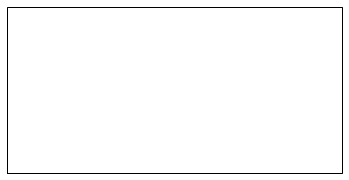

In [51]:
#An attempt at using Iris' native regridding to do this. Fails to plot...
average=varname="tas_spatialmean_ann"
variable_constraint = Constraint(cube_func=(lambda c: c.var_name == varname))
mh_dict=ensemble_members_dict(varname,"midHolocene")
ctl_dict=ensemble_members_dict(varname,"piControl")
grid_target=iris.load(mh_dict.get("AWI-ESM"),variable_constraint)
average=grid_target[0]
print(average.data)
n=0
for gcm in mh_dict:
    if gcm in ctl_dict:
        expt_a=iris.load(mh_dict.get(gcm),variable_constraint)
        expt_b=iris.load(ctl_dict.get(gcm),variable_constraint)
        diff=expt_a[0] - expt_b[0]
        #print('expt_a is %s, expt_b is %s and the difference is %s' % (expt_a[0].data,expt_b[0].data,diff[0].data))
        diff_target=diff.regrid(grid_target[0], iris.analysis.Linear())
        #print(diff_target.data)
        weighted=average.data*n
        average.data=np.add(weighted,diff_target.data)
        average.data=average.data/(n+1)
        #print(average.data)
        n=n+1
        

print(average.data)        
iris.plot.contourf(average,levels=np.arange(-5,5,1),extend='both')

## Scatter Plots 

### Read in data
These scripts make use of the fact that as well as the individual model files there are some mode and ipcc timeseries variables extracted using NCL and sitting in the ~/data directory. This does curtail which plots are possible, but makes them easier and forces me to practice python.

In [3]:
ipcc_filename = 'data/ipcc_region_array.nc'
ipcc_dataset = xr.open_dataset(ipcc_filename)
ipcc=ipcc_dataset.ipcc_region_array
#Populate some dictionaries for searching over
ts_dict={}
for i in range(ipcc.sizes['timeseries_id']):
        ts_dict[ipcc_dataset['timeseries'].data[i]]=ipcc_dataset['timeseries_id'].data[i]
gcm_dict={}
for i in range(ipcc.sizes['model_id']):
        gcm_dict[ipcc_dataset['models'].data[i]]=ipcc_dataset['model_id'].data[i]
expt_dict={}
for i in range(ipcc.sizes['expt_id']):
        expt_dict[ipcc_dataset['expts'].data[i]]=ipcc_dataset['expt_id'].data[i]
print(gcm_dict)

{'AWI-ESM': 0, 'bcc-csm1-1': 1, 'CCSM4': 2, 'CESM2': 3, 'CNRM-CM5': 4, 'COSMOS-ASO': 5, 'CSIRO-Mk3-6-0': 6, 'CSIRO-Mk3L-1-2': 7, 'EC-EARTH-2-2': 8, 'FGOALS-g2': 9, 'FGOALS-s2': 10, 'GISS-E2-1-G': 11, 'GISS-E2-R': 12, 'HadCM3': 13, 'HadGEM2-CC': 14, 'HadGEM2-ES': 15, 'HadGEM3-GC31': 16, 'IPSL-CM5A-LR': 17, 'IPSL-CM6A-LR': 18, 'KCM1-2-2': 19, 'MIROC-ESM': 20, 'MPI-ESM-P': 21, 'MRI-CGCM3': 22}


In [16]:
#Try loading in some sample data
x_variable="ipcc_NEU_tas"
y_variable="ipcc_GLOBAL_all_pr"
x_var_is_stddev=False
y_var_is_stddev=False

piCtl=ipcc[:,0,ts_dict[x_variable],x_var_is_stddev].data
others=ipcc[:,:,ts_dict[x_variable],x_var_is_stddev].data
print(others[:,2])
print(others[:,5])
x=others.T-piCtl.T
piCtl=ipcc[:,0,ts_dict[y_variable],y_var_is_stddev].data
others=ipcc[:,:,ts_dict[y_variable],y_var_is_stddev].data
print(others[:,2])
print(others[:,5])
y=others.T-piCtl.T
y.shape

[-16.268625        nan -16.269482        nan -15.597821 -19.393066
        nan        nan        nan -21.84633         nan        nan
 -20.151003        nan        nan        nan        nan -20.85693
        nan        nan -18.437119 -19.449175 -16.542027]
[       nan        nan -16.30676         nan -15.658231 -19.427437
        nan        nan        nan -21.882582        nan        nan
 -20.183214        nan        nan        nan        nan -20.890905
        nan        nan -18.470167 -19.482231 -16.585548]
[2.6154559       nan 2.6160693       nan 2.8721943 2.319101        nan
       nan       nan 2.5670347       nan       nan 2.9087784       nan
       nan       nan       nan 2.3096173       nan       nan 2.5209
 2.682212  2.5699017]
[      nan       nan 2.541868        nan 2.7937598 2.2491817       nan
       nan       nan 2.4960742       nan       nan 2.8562276       nan
       nan       nan       nan 2.2543194       nan       nan 2.4573164
 2.5760086 2.4503646]


(11, 23)

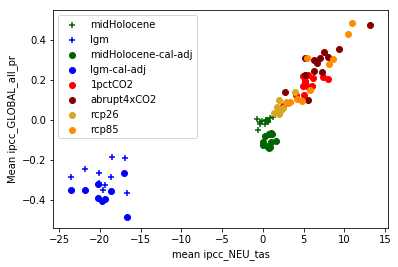

In [17]:
colors = ['black','darkgreen','blue','lime','darkgreen','blue','lime','red','maroon','goldenrod','darkorange']
markers = ['o','+','+','+','o','o','o','o','o','o','o']

#Plot with lig for this one...
for expt in ipcc_dataset['expt_id'].data[1:]:
    this_label=ipcc_dataset['expts'].data[expt]
    if this_label.startswith('lig') != True: 
        plt.scatter(x[expt,:], y[expt,:], color=colors[expt],marker=markers[expt],label=this_label)
    
plt.xlabel("mean "+x_variable)
plt.ylabel("Mean "+y_variable)
plt.legend(loc='best')

In [18]:
modes_filename = 'data/modes_array.nc'
modes_dataset = xr.open_dataset(modes_filename)
modes=modes_dataset.modes_array
print(modes_dataset)
#Populate some dictionaries for searching over
mode_dict={}
for i in range(modes_dataset.sizes['modes_id']):
        mode_dict[modes_dataset['modenames'].data[i]]=modes_dataset['modes_id'].data[i]
print(mode_dict)

<xarray.Dataset>
Dimensions:      (expt_id: 11, model_id: 23, modes_id: 17, ncl0: 23, ncl1: 11, ncl2: 17)
Coordinates:
  * model_id     (model_id) int32 0 1 2 3 4 5 6 7 8 ... 15 16 17 18 19 20 21 22
  * expt_id      (expt_id) int32 0 1 2 3 4 5 6 7 8 9 10
  * modes_id     (modes_id) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
Dimensions without coordinates: ncl0, ncl1, ncl2
Data variables:
    modes_array  (ncl0, ncl1, ncl2) float32 ...
    models       (model_id) object ...
    expts        (expt_id) object ...
    modenames    (modes_id) object ...
{'nino34': 0, 'iod_timeseries_mon': 1, 'amo_timeseries_mon': 2, 'amm_timeseries_mon': 3, 'atl3_timeseries_mon': 4, 'tropical_indian_ocean': 5, 'southern_ocean': 6, 'south_tropical_atlantic': 7, 'north_tropical_atlantic': 8, 'nino34_skew': 9, 'nino3': 10, 'nino4': 11, 'pdo_pattern_mon': 12, 'ipo_pattern_mon': 13, 'nam_pattern_mon': 14, 'nao_pattern_djf': 15, 'sam_mon': 16}


In [19]:
y_variable="nao_pattern_djf"
piCtl=modes[:,0,mode_dict[y_variable]].data
others=modes[:,:,mode_dict[y_variable]].data
print(others[:,2])
print(others[:,5])
y=others.T/piCtl.T
y.shape

[2.1066604       nan 1.5473198       nan 1.7944957 2.2081876       nan
       nan       nan 1.6284605       nan       nan 1.5514171       nan
       nan       nan       nan 1.6128222       nan       nan 1.9389216
 1.999303  1.7802167]
[      nan       nan 1.5511539       nan 1.8008978 2.2149756       nan
       nan       nan 1.6319157       nan       nan 1.553675        nan
       nan       nan       nan 1.6168224       nan       nan 1.9442344
 2.0031834 1.7872415]


(11, 23)

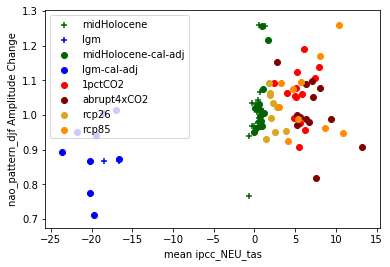

In [20]:
colors = ['black','darkgreen','blue','lime','darkgreen','blue','lime','red','maroon','goldenrod','darkorange']
markers = ['o','+','+','+','o','o','o','o','o','o','o']

#Plot with lig for this one...
for expt in ipcc_dataset['expt_id'].data[1:]:
    this_label=ipcc_dataset['expts'].data[expt]
    if this_label.startswith('lig') != True: 
        plt.scatter(x[expt,:], y[expt,:], color=colors[expt],marker=markers[expt],label=this_label)
    
plt.xlabel("mean "+x_variable)
plt.ylabel(y_variable+" Amplitude Change")
plt.legend(loc='best')

**And now to make an actual plot for the paper...**

nino34
iod_timeseries_mon
amm_timeseries_mon
atl3_timeseries_mon
pdo_pattern_mon
nam_pattern_mon
nao_pattern_djf
sam_mon


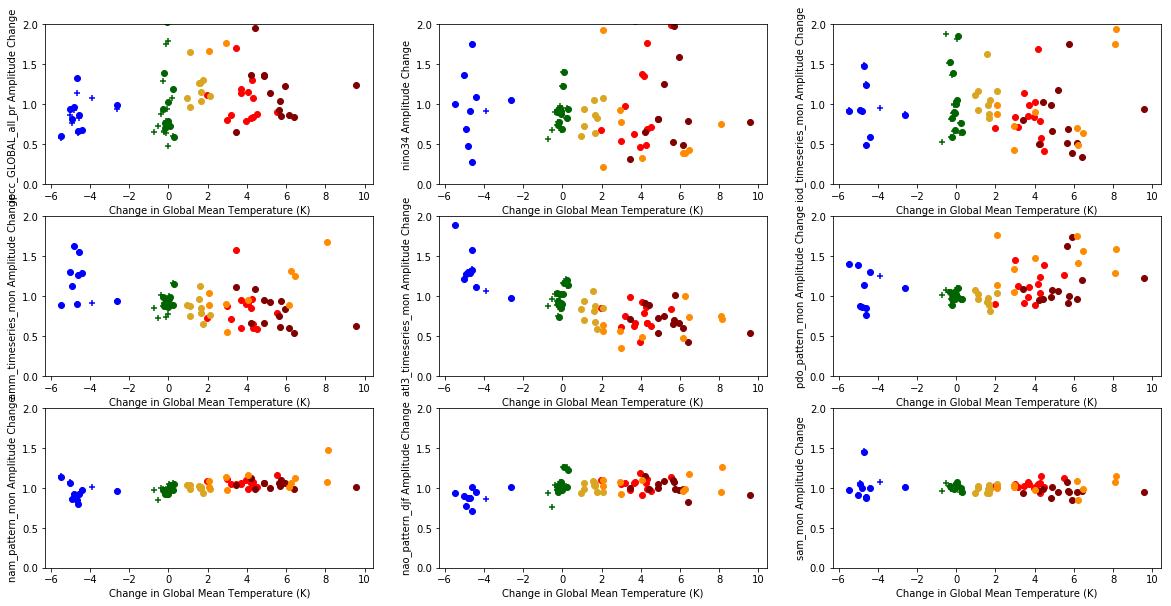

In [42]:
#Load in stuff (from above)
ipcc_filename = 'data/ipcc_region_array.nc'
ipcc_dataset = xr.open_dataset(ipcc_filename)
ipcc=ipcc_dataset.ipcc_region_array
#Populate some dictionaries for searching over
ts_dict={}
for i in range(ipcc.sizes['timeseries_id']):
        ts_dict[ipcc_dataset['timeseries'].data[i]]=ipcc_dataset['timeseries_id'].data[i]
gcm_dict={}
for i in range(ipcc.sizes['model_id']):
        gcm_dict[ipcc_dataset['models'].data[i]]=ipcc_dataset['model_id'].data[i]
expt_dict={}
for i in range(ipcc.sizes['expt_id']):
        expt_dict[ipcc_dataset['expts'].data[i]]=ipcc_dataset['expt_id'].data[i]
modes_filename = 'data/modes_array.nc'
modes_dataset = xr.open_dataset(modes_filename)
modes=modes_dataset.modes_array
#Populate mode dictionaries for searching over
mode_dict={}
for i in range(modes_dataset.sizes['modes_id']):
        mode_dict[modes_dataset['modenames'].data[i]]=modes_dataset['modes_id'].data[i]
        
#Load in the X variable (GMT change)
x_variable="ipcc_GLOBAL_all_tas"
x_var_is_stddev=False
piCtl=ipcc[:,0,ts_dict[x_variable],x_var_is_stddev].data
others=ipcc[:,:,ts_dict[x_variable],x_var_is_stddev].data
x=others.T-piCtl.T

colors = ['black','darkgreen','blue','lime','darkgreen','blue','lime','red','maroon','goldenrod','darkorange']
markers = ['o','+','+','+','o','o','o','o','o','o','o']


#Define the Y variables
y_names=["ipcc_GLOBAL_all_pr","nino34","iod_timeseries_mon","amm_timeseries_mon","atl3_timeseries_mon","pdo_pattern_mon","nam_pattern_mon","nao_pattern_djf","sam_mon"]
subplot_num=331
plt.figure(figsize=(20,10))
for i in range(len(y_names)):
    plt.subplot(subplot_num+i)
    if y_names[i] in mode_dict:
        print(y_names[i])
        piCtl=modes[:,0,mode_dict[y_names[i]]].data
        others=modes[:,:,mode_dict[y_names[i]]].data
        y=others.T/piCtl.T
    else:
        piCtl=ipcc[:,0,ts_dict[y_names[i]],1].data
        others=ipcc[:,:,ts_dict[y_names[i]],1].data
        y=others.T/piCtl.T                    
    for expt in ipcc_dataset['expt_id'].data[1:]:
        this_label=ipcc_dataset['expts'].data[expt]
        if this_label.startswith('lig') != True: 
            plt.scatter(x[expt,:], y[expt,:], color=colors[expt],marker=markers[expt],label=this_label)
    plt.xlabel("Change in Global Mean Temperature (K)")
    plt.ylabel(y_names[i]+" Amplitude Change")
    plt.ylim(0, 2)
    #plt.legend(loc='best')
                    
plt.show()